<a href="https://colab.research.google.com/github/Avasa29/EDA-1-GT/blob/main/Global_Terrorism_Analysis_EDA_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

In [ ]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
#Mounting Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#file Loading
file_path = '/content/drive/MyDrive/My project EDA/Global Terrorism Data.csv'
GT_df = pd.read_csv(file_path , encoding='latin-1')
GT_df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [ ]:
#check file Details & data understanding
GT_df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [ ]:
GT_df.shape

(181691, 135)

In [ ]:
GT_df.dtypes


eventid        int64
iyear          int64
imonth         int64
iday           int64
approxdate    object
               ...  
INT_LOG        int64
INT_IDEO       int64
INT_MISC       int64
INT_ANY        int64
related       object
Length: 135, dtype: object

In [ ]:
GT_df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
GT_df.rename(columns={'iyear':'YEAR','imonth':'MONTH','iday':'DAY','country_txt':'Country','region_txt':'REGION','provstate':'STATE','attacktype1_txt':'Attacktype','target1':'TARGET','nkill':'KILLED','nwound':'Wound','gname':'Group','targettype1_txt':'Target','weapontype1_txt':'Weapon_Type','motive':'Motive'},inplace=True)

In [ ]:
#Missing Value % in GT data
missing_values =(((GT_df.isnull().sum()).sum())/GT_df.size)*100
missing_values

56.481718962414206

So it is clear that there are 55% vlaues are null. So need to clean the GT data.

In [ ]:
#GT dataframe with usefull data.
GT_df = GT_df[{'YEAR','MONTH','DAY','Country','REGION','STATE','Attacktype','TARGET','KILLED','Wound','Group','TARGET','Weapon_Type','Motive'}]
GT_df.head(20)

,Weapon_Type,Attacktype,Motive,KILLED,REGION,DAY,TARGET,STATE,MONTH,YEAR,Country,Wound,Group
0,Unknown,Assassination,NaN,1.0,Central America & Caribbean,2,Julio Guzman,NaN,7,1970,Dominican Republic,0.0,MANO-D
1,Unknown,Hostage Taking (Kidnapping),NaN,0.0,North America,0,"Nadine Chaval, daughter",Federal,0,1970,Mexico,0.0,23rd of September Communist League
2,Unknown,Assassination,NaN,1.0,Southeast Asia,0,Employee,Tarlac,1,1970,Philippines,0.0,Unknown
3,Explosives,Bombing/Explosion,NaN,NaN,Western Europe,0,U.S. Embassy,Attica,1,1970,Greece,NaN,Unknown
4,Incendiary,Facility/Infrastructure Attack,NaN,NaN,East Asia,0,U.S. Consulate,Fukouka,1,1970,Japan,NaN,Unknown
5,Firearms,Armed Assault,To protest the Cairo Illinois Police Deparment,0.0,North America,1,Cairo Police Headquarters,Illinois,1,1970,United States,0.0,Black Nationalists
6,Firearms,Assassination,NaN,0.0,South America,2,Juan Maria de Lucah/Chief of Directorate of in...,Montevideo,1,1970,Uruguay,0.0,Tupamaros (Uruguay)
7,Explosives,Bombing/Explosion,NaN,0.0,North America,2,Edes Substation,California,1,1970,United States,0.0,Unknown
8,Incendiary,Facility/Infrastructure Attack,To protest the War in Vietnam and the draft,0.0,North America,2,"R.O.T.C. offices at University of Wisconsin, M...",Wisconsin,1,1970,United States,0.0,New Year's Gang
9,Incendiary,Facility/Infrastructure Attack,To protest the War in Vietnam and the draft,0.0,North America,3,Selective Service Headquarters in Madison Wisc...,Wisconsin,1,1970,United States,0.0,New Year's Gang


In [ ]:
for i in GT_df.columns:
  print(i,GT_df[i].nunique())

Weapon_Type 12
Attacktype 9
Motive 14490
KILLED 205
REGION 12
DAY 32
TARGET 86006
STATE 2855
MONTH 13
YEAR 47
Country 205
Wound 238
Group 3537


In [ ]:
GT_df.info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Weapon_Type  181691 non-null  object 
 1   Attacktype   181691 non-null  object 
 2   Motive       50561 non-null   object 
 3   KILLED       171378 non-null  float64
 4   REGION       181691 non-null  object 
 5   DAY          181691 non-null  int64  
 6   TARGET       181055 non-null  object 
 7   STATE        181270 non-null  object 
 8   MONTH        181691 non-null  int64  
 9   YEAR         181691 non-null  int64  
 10  Country      181691 non-null  object 
 11  Wound        165380 non-null  float64
 12  Group        181691 non-null  object 
dtypes: float64(2), int64(3), object(8)
memory usage: 18.0+ MB


Here Killed & Wound have lots of Null Values.Need to fill them.

In [ ]:
GT_df['Wound'] = GT_df['Wound'].fillna(0).astype(int)
GT_df['KILLED'] = GT_df['KILLED'].fillna(0).astype(int)

In [ ]:
GT_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Weapon_Type  181691 non-null  object
 1   Attacktype   181691 non-null  object
 2   Motive       50561 non-null   object
 3   KILLED       181691 non-null  int64 
 4   REGION       181691 non-null  object
 5   DAY          181691 non-null  int64 
 6   TARGET       181055 non-null  object
 7   STATE        181270 non-null  object
 8   MONTH        181691 non-null  int64 
 9   YEAR         181691 non-null  int64 
 10  Country      181691 non-null  object
 11  Wound        181691 non-null  int64 
 12  Group        181691 non-null  object
dtypes: int64(5), object(8)
memory usage: 18.0+ MB


Usefull Data


In [ ]:
GT_df.head(20)

,Weapon_Type,Attacktype,Motive,KILLED,REGION,DAY,TARGET,STATE,MONTH,YEAR,Country,Wound,Group
0,Unknown,Assassination,NaN,1,Central America & Caribbean,2,Julio Guzman,NaN,7,1970,Dominican Republic,0,MANO-D
1,Unknown,Hostage Taking (Kidnapping),NaN,0,North America,0,"Nadine Chaval, daughter",Federal,0,1970,Mexico,0,23rd of September Communist League
2,Unknown,Assassination,NaN,1,Southeast Asia,0,Employee,Tarlac,1,1970,Philippines,0,Unknown
3,Explosives,Bombing/Explosion,NaN,0,Western Europe,0,U.S. Embassy,Attica,1,1970,Greece,0,Unknown
4,Incendiary,Facility/Infrastructure Attack,NaN,0,East Asia,0,U.S. Consulate,Fukouka,1,1970,Japan,0,Unknown
5,Firearms,Armed Assault,To protest the Cairo Illinois Police Deparment,0,North America,1,Cairo Police Headquarters,Illinois,1,1970,United States,0,Black Nationalists
6,Firearms,Assassination,NaN,0,South America,2,Juan Maria de Lucah/Chief of Directorate of in...,Montevideo,1,1970,Uruguay,0,Tupamaros (Uruguay)
7,Explosives,Bombing/Explosion,NaN,0,North America,2,Edes Substation,California,1,1970,United States,0,Unknown
8,Incendiary,Facility/Infrastructure Attack,To protest the War in Vietnam and the draft,0,North America,2,"R.O.T.C. offices at University of Wisconsin, M...",Wisconsin,1,1970,United States,0,New Year's Gang
9,Incendiary,Facility/Infrastructure Attack,To protest the War in Vietnam and the draft,0,North America,3,Selective Service Headquarters in Madison Wisc...,Wisconsin,1,1970,United States,0,New Year's Gang


ANALYSIS

---



In [ ]:
GT_df['Attacktype'].value_counts()

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: Attacktype, dtype: int64

In [ ]:
(GT_df['Attacktype'].value_counts()/GT_df.shape[0])*100

Bombing/Explosion                      48.574228
Armed Assault                          23.484377
Assassination                          10.629035
Hostage Taking (Kidnapping)             6.141196
Facility/Infrastructure Attack          5.699787
Unknown                                 4.004601
Unarmed Assault                         0.558641
Hostage Taking (Barricade Incident)     0.545432
Hijacking                               0.362704
Name: Attacktype, dtype: float64

Most Attacked target

AttributeError: ignored

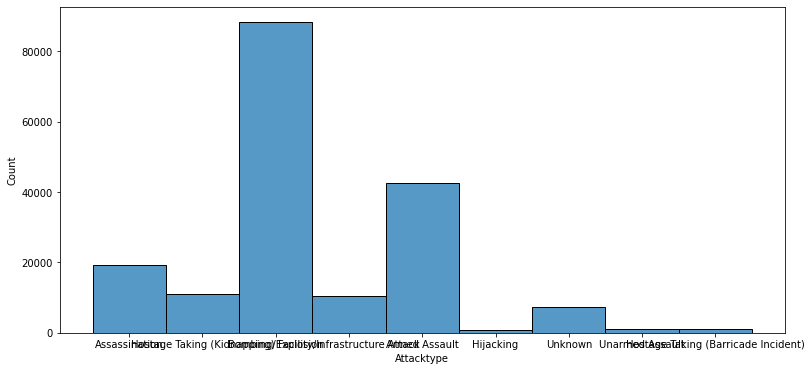

In [ ]:
plt.figure(figsize = (13,6))
sns.histplot(GT_df['Attacktype'],palette='cubehelix')
plt.tittle('Attacktype' ,fontsize=20)
plt.xticks(rotation=180)
plt.show()